# IMPORTAÇÃO DAS BIBLIOTECAS

### A página a seguir apresenta um modelo analítico cujo objetivo é compreender um conjunto de variáveis acerca de clientes e encontrar semelhanças que agrupem os clientes em conjuntos, com características semelhantes entre si e diferentes entre os outros grupos.
### A presente página visa apresentar não apenas o modelo, como também a metodologia adotada e os conceitos envolvidos para escolha das técnicas utilizadas.

O código abaixo realiza a importação de todas as bibliotecas que foram utilizadas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_excel("Dataset - Code Challenge Data Scientist.xlsx")
print('Este dataset possui %s linhas e %s colunas' % (data.shape[0], data.shape[1]))

Este dataset possui 4972 linhas e 11 colunas


# ENTENDIMENTO DOS DADOS

A presente seção contém o entendimento das variáveis contidas neste modelo.
A tabela abaixo apresenta as variáveis que estão disponíveis para o desenvolvimento do modelo e uma pequena amostra dos dados.

In [3]:
data.head()

,ID,GEO_REFERENCIA,DATA_NASCIMENTO,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL
0,1,780,1992-08-15,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.857143,342.857143,428.571429,28.571429,A
1,2,35,1990-02-24,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),942.857143,0.000000,0.000000,0.000000,A
2,3,54,1987-07-17,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),2000.000000,0.000000,0.000000,2857.142857,A
3,4,35,1988-04-27,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),857.142857,285.714286,0.000000,1428.571429,A
4,5,883,1971-12-10,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),8615.385714,0.000000,0.000000,47471.788571,A


A listagem abaixo apresenta a quantidade total de observações disponíveis para análise, a quantidade de registros com valor ausente e o tipo correspondente a cada variável.
Como pode ser observado, a base não contém nenhum valor ausente, o que significa que, provavelmente, não será necessário fazer tratamento de valores missings.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 11 columns):
ID                 4972 non-null int64
GEO_REFERENCIA     4972 non-null int64
DATA_NASCIMENTO    4972 non-null datetime64[ns]
PROFISSAO          4972 non-null object
GENERO             4972 non-null object
ESTADO_CIVIL       4972 non-null object
VALOR_01           4972 non-null float64
VALOR_02           4972 non-null float64
VALOR_03           4972 non-null float64
VALOR_04           4972 non-null float64
PERFIL             4972 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 427.4+ KB


# VARIÁVEIS CATEGORICAS

A presente seção apresenta o detalhamento quanto ao conteúdo de cada variável categórica.
Quantidade de valores únicos, categoria com maior e com menor quantidade de observações etc.

A primeira variável a ser analisada é a variável DATA_NASCIMENTO.
Na análise é possível observar que dentre os 4972 valores preenchidos, 3982 são únicos, ou seja, apenas 990 se repetem.
Também é possível observar que apenas 5 pessoas nasceram no mesmo dia, dia 05 de janeiro de 1977.
A pessoa mais velha dentre os clientes tem 93 anos e a penas mais jovem tem 2 anos de idade.

#### A partir desta variável, surgiu a necessidade de criação da variável ANO, que provavelmente tem categorias com maior número de repetições dentre as observações.

In [5]:
data["DATA_NASCIMENTO"].describe()
# NECESSIDADE DE CRIAÇÃO DA VARIÁVEL ANO

count                    4972
unique                   3982
top       1977-01-05 00:00:00
freq                        5
first     1925-11-03 00:00:00
last      2016-08-01 00:00:00
Name: DATA_NASCIMENTO, dtype: object

A próxima variável que será analisada é a variável PERFIL. Foi observado que esta variável contém 4 categorias e mais recorrente é o perfil A, para este perfil ocorreram 3489 observações, ou seja, 70% dos clientes pertencem a um mesmo perfil.

In [6]:
data["PERFIL"].describe()

count     4972
unique       4
top          A
freq      3489
Name: PERFIL, dtype: object

A próxima variável a ser analisada é a variável PROFISSÃO. Esta variável contém 79 níveis e o nível mais recorrente é a profissão ANALISTA DE SISTEMAS, com 564 observações.

#### Será necessário redistribuir as categorias desta variável, devido a alta quantidade de níveis e a baixa quantidade de observações em algumas categorias.

In [7]:
data["PROFISSAO"].describe()
# NECESSIDADE DE REDISTRIBUIÇÃO, MUITAS CATEGORIAS E ALGUMAS COM POUCAS OBSERVAÇÕES

count                     4972
unique                      79
top       ANALISTA DE SISTEMAS
freq                       564
Name: PROFISSAO, dtype: object

In [8]:
data["PROFISSAO"].value_counts()

ANALISTA DE SISTEMAS                                  564
ENGENHEIRO                                            505
ADMINISTRADOR                                         442
ESTUDANTE                                             409
SERVIDOR PÚBLICO FEDERAL                              279
AUTÔNOMO                                              269
AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS                 215
SERVIDOR PÚBLICO ESTADUAL                             211
EMPRESÁRIO                                            164
MÉDICO                                                157
MILITAR EM GERAL                                      123
ADVOGADO                                              119
BANCARIO E ECONOMIÁRIO                                113
SERVIDOR PÚBLICO MUNICIPAL                            108
APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)                93
CONTADOR                                               87
VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA            81
PROFESSOR DE P

A próxima variável a ser analisada é a variável ESTADO_CIVIL. Esta variável contém 8 níveis e a categoria mais recorrente é o status SOLTEIRO(A), que corresponde a 2584 observações, quase metade da base.

#### Também será necessário redistribuir as categorias desta variável, devido a grande diferença de observações entre as categorias existentes.

In [9]:
data["ESTADO_CIVIL"].describe()
# NECESSIDADE REDISTRIBUIÇÃO DAS CATEGORIAS, CATEGORIAS COM POUCAS OBSERVAÇÕES

count            4972
unique              8
top       SOLTEIRO(A)
freq             2584
Name: ESTADO_CIVIL, dtype: object

In [10]:
data["ESTADO_CIVIL"].value_counts()

SOLTEIRO(A)                                    2584
CASADO(A) COM BRASILEIRO(A) NATO(A)            1870
UNIAO ESTAVEL                                   267
DIVORCIADO(A)                                   164
VIUVO(A)                                         35
CASADO(A) COM ESTRANGEIRO(A)                     20
DESQUITADO(A)                                    19
CASADO(A) COM BRASILEIRO(A) NATURALIZADO(A)      13
Name: ESTADO_CIVIL, dtype: int64

A última variável categórica a ser analisada é a variável GENERO. Esta variável contém apenas 2 níveis e a maioria dos registros estão contidos em uma das categorias.

In [11]:
data["GENERO"].describe()

count     4972
unique       2
top          M
freq      3865
Name: GENERO, dtype: object

# VARIÁVEIS CONTÍNUAS

Esta seção visa analisar as informações estatísticas das variáveis contínuas.

A primeira variável a ser análisa é a GEO_REFERENCIA.
As informações estatísticas desta variável estão dentro da normalidade, sem valores muito afastados da média, transição entre os quartis gradativa, aparentemente sem outliers.

In [12]:
data["GEO_REFERENCIA"].describe()

count    4972.000000
mean      336.807522
std       300.711983
min        10.000000
25%        70.000000
50%       224.000000
75%       607.000000
max       999.000000
Name: GEO_REFERENCIA, dtype: float64

A próximas 4 variáveis a serem analisadas são as variáveis VALOR_01, VALOR_02, VALOR_03 e VALOR_04.
Ambas são variáveis com observações muito acima ou abaixo da média, transição entre os quartis muito diferentes, o que indica a presença de outliers, principalmente nas variáveis 2, 3 e 4.
#### Os outliers destas 4 variáveis serão tratados adiante.

In [13]:
data["VALOR_01"].describe()
# PRESENÇA DE OUTLIERS

count      4972.000000
mean       2022.698192
std        6098.823138
min           0.000000
25%         628.571429
50%        1371.428571
75%        2571.428571
max      400000.000000
Name: VALOR_01, dtype: float64

In [14]:
data["VALOR_02"].describe()
# PRESENÇA DE OUTLIERS

count    4.972000e+03
mean     1.863806e+04
std      8.918084e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.005771e+03
max      2.857143e+06
Name: VALOR_02, dtype: float64

In [15]:
data["VALOR_03"].describe()
# PRESENÇA DE OUTLIERS

count    4.972000e+03
mean     4.246265e+03
std      3.764594e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.428571e+06
Name: VALOR_03, dtype: float64

In [16]:
data["VALOR_04"].describe()
# PRESENÇA DE OUTLIERS

count      4972.000000
mean       5041.123332
std       23246.036503
min           0.000000
25%           0.000000
50%           0.000000
75%        1428.571429
max      685714.285714
Name: VALOR_04, dtype: float64

# EXCLUSÃO E CRIAÇÃO DE VARIÁVEIS

Esta seção tem a finalidade de excluir variáveis que não serão utilizadas no modelo e a criação de novas variáveis a partir das variáveis disponíveis.

A variável ANO será criada a partir da variável DATA_NASCIMENTO, pois poucas pessoas têm a mesma data de nascimento, mas muitas pessoas várias pessoas têm a mesma idade, portanto será mais fácil encontrar padrões com esta última variável.
As variáveis ID e DATA_NASCIMENTO serão excluídas, devido a alta granularidade de ambas.
A variável DATA_NASCIMENTO também não pode ser utilizada devido a alta colinearidade com a variável ANO.

In [17]:
data_aux = data.copy()

In [18]:
data_aux["ANO"] = list(map(lambda var: var.date().year,data_aux["DATA_NASCIMENTO"]))

In [19]:
data_aux = data_aux.drop(["ID","DATA_NASCIMENTO"],axis=1)
data_aux.head()

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,ANO
0,780,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.857143,342.857143,428.571429,28.571429,A,1992
1,35,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),942.857143,0.000000,0.000000,0.000000,A,1990
2,54,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),2000.000000,0.000000,0.000000,2857.142857,A,1987
3,35,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),857.142857,285.714286,0.000000,1428.571429,A,1988
4,883,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),8615.385714,0.000000,0.000000,47471.788571,A,1971


In [20]:
data1 = data_aux.copy()

# FAZER ANÁLISE DE OUTLIERS

Esta seção tem a finalidade de compreender o quanto os outliers encontrados nas análises anteriores podem interferir na base de dados e qual a melhor estratégias para eliminá-los.

Primeiramente foi observada a grande variação de valores de cada uma das 4 variáveis.
Nos gráficos abaixo, é possível observar que a variável VALOR_01 tem um padrão de valores e alguns valores muito fora da média, enquanto as variáveis VALOR_02, VALOR_03 e VALOR_04 têm vários valores fora da média.

Um vez identificada e confirmada a existência de outliers e seu impacto na modelagem dos dados, foi considerada a possibilidade de exclusão dos registros com valores muito discrepantes, entretanto depois da realização de alguns testes percebeu-se que a remoção dos valores discrepantes para as 4 variáveis resumiria a base em uma quantidade muito pequena de observações, por isso optou-se em aplicar o valor da média nos valores discrepantes.

Para encontrar os valores discrepantes foi verificada a distância entre a cada observação e a média, quando este valor era maior que duas vezes o desvio padrão, o valor da variável foi substituído pela média da variável.

In [21]:
data_aux = data1.copy()

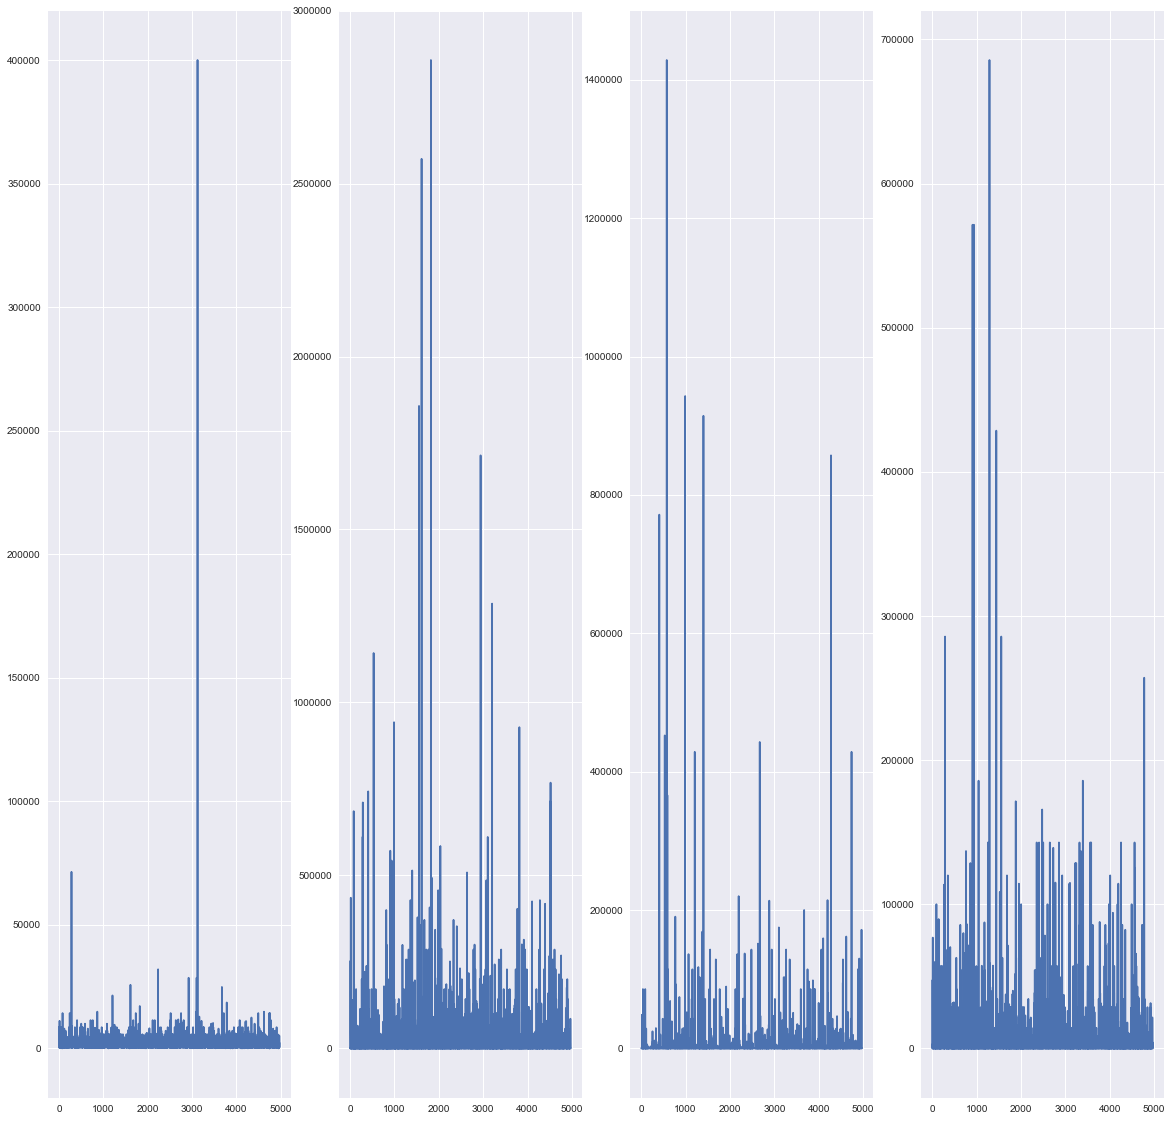

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(20,20))
axes[0].plot(data_aux["VALOR_01"])
axes[1].plot(data_aux["VALOR_02"])
axes[2].plot(data_aux["VALOR_03"])
axes[3].plot(data_aux["VALOR_04"])

In [23]:
def outliers(var):
    if np.abs(var-variavel.mean())<=0.5*variavel.std():
        return var
    else:
        return variavel.mean()

In [24]:
# VALOR_01
variavel = data_aux["VALOR_01"]
data_aux["VALOR_01"] = list(map(outliers,variavel))
data_aux["VALOR_01"].describe()

count    4972.000000
mean     1553.224860
std      1099.584639
min         0.000000
25%       628.571429
50%      1371.428571
75%      2057.142857
max      5040.000000
Name: VALOR_01, dtype: float64

In [25]:
# VALOR_02
variavel = data_aux["VALOR_02"]
variavel = list(map(outliers,variavel))
data_aux["VALOR_02"] = variavel
data_aux["VALOR_02"].describe()

count     4972.000000
mean      5945.866492
std      11694.240680
min          0.000000
25%          0.000000
50%          0.000000
75%       6005.771429
max      63225.928571
Name: VALOR_02, dtype: float64

In [26]:
# VALOR_03
variavel = data_aux["VALOR_03"]
variavel = list(map(outliers,variavel))
data_aux["VALOR_03"] = variavel
data_aux["VALOR_03"].describe()

count     4972.000000
mean       788.920196
std       2668.153641
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22857.142857
Name: VALOR_03, dtype: float64

In [27]:
# VALOR_04
variavel = data_aux["VALOR_04"]
variavel = list(map(outliers,variavel))
data_aux["VALOR_04"] = variavel
data_aux["VALOR_04"].describe()

count     4972.000000
mean      1567.580910
std       3195.954732
min          0.000000
25%          0.000000
50%          0.000000
75%       1428.571429
max      16571.428571
Name: VALOR_04, dtype: float64

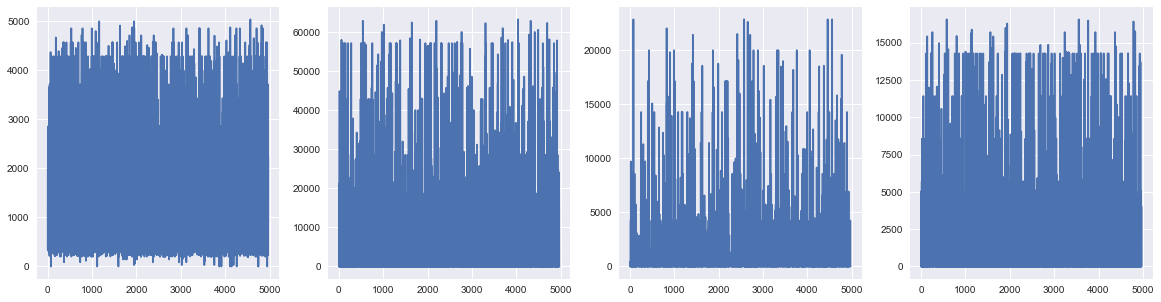

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
axes[0].plot(data_aux["VALOR_01"])
axes[1].plot(data_aux["VALOR_02"])
axes[2].plot(data_aux["VALOR_03"])
axes[3].plot(data_aux["VALOR_04"])

In [29]:
data2 = data_aux.copy()

# RECATEGORIZAR VARIÁVEIS

Esta seção tem o objetivo de redistribuir as categorias de variáveis com muitos níveis ou categorias com pocas observações.

In [30]:
data_aux = data2.copy()

In [31]:
def estudo_recat(coluna,w,h):
    lista = data_aux[coluna].unique()
    fig, axes = plt.subplots(lista.size, 4, figsize=(w,h))
    i=0
    for j in lista:
        axes[i][0].plot(data_aux[data_aux[coluna]==j]["VALOR_01"])
        axes[i][0].set_xlabel(j)
        axes[i][0].set_ylabel("VALOR_01")
        axes[i][1].plot(data_aux[data_aux[coluna]==j]["VALOR_02"])
        axes[i][1].set_xlabel(j)
        axes[i][1].set_ylabel("VALOR_02")
        axes[i][2].plot(data_aux[data_aux[coluna]==j]["VALOR_03"])
        axes[i][2].set_xlabel(j)
        axes[i][2].set_ylabel("VALOR_03")
        axes[i][3].plot(data_aux[data_aux[coluna]==j]["VALOR_04"])
        axes[i][3].set_xlabel(j)
        axes[i][3].set_ylabel("VALOR_04")
        i=i+1

In [32]:
def aplica_cat_outras(var):
    if var in lista:
        return "OUTROS"
    else:
        return var

In [33]:
def aplica_faixa_etaria(var):
    idade = datetime.now().year-var
    if idade < 18:
        return "infantil"
    elif (idade >= 18 and idade <30) or (idade >= 40):
        return "jovem/idoso"
    elif idade >= 30 and idade < 40:
        return "adulto"
    else:
        return var

A primeira variável a sofre recategorização foi a PROFISSAO, devido a alta quantidade de níveis existente.
Foi observado que muitas categorias continham menos de 100 observações e para esta quantidade tão pequena de observações não foi possível realizar cruzamento com outros dados, pois era informações muito fora do contexto.
Portanto, todas as observações cujo PROFISSAO tinha uma frequência menor que 100 na base foram recategorizadas para a categoria OUTROS.

Com esta modificação, a variável PROFISSAO passou a ter 15 níveis, e o nível mais recorrente passou a ser o nível OUTROS.

In [34]:
freq_profissoes = data_aux['PROFISSAO'].value_counts()
lista = freq_profissoes[freq_profissoes<100]
data_aux['PROFISSAO'] = list(map(aplica_cat_outras,data_aux['PROFISSAO']))
data_aux["PROFISSAO"].value_counts()

OUTROS                                   1294
ANALISTA DE SISTEMAS                      564
ENGENHEIRO                                505
ADMINISTRADOR                             442
ESTUDANTE                                 409
SERVIDOR PÚBLICO FEDERAL                  279
AUTÔNOMO                                  269
AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS     215
SERVIDOR PÚBLICO ESTADUAL                 211
EMPRESÁRIO                                164
MÉDICO                                    157
MILITAR EM GERAL                          123
ADVOGADO                                  119
BANCARIO E ECONOMIÁRIO                    113
SERVIDOR PÚBLICO MUNICIPAL                108
Name: PROFISSAO, dtype: int64

A próxima variável a sofrer alteração foi a variável ESTADO_CIVIL.
Esta variável foi apresentada no gráfico separada por cada um dos níveis e em contraponto com as variáveis VALOR_01, VALOR_02, VALOR_03 e VALOR_04, em gráficos diferentes.
#### Nesta análise foi possível observar que os níveis SOLTEIRO(A) e CASADO(A) COM BRASILEIRO(A) NATO(A) tiham cada um padrão próprio, enquanto os demais níveis tinham um outro padrão semelhante entre si.
Por isso, estes valores foram agrupados, utilizando como recurso a frequência de observações por nível.
Pode-se observar uma sútil semelhança entre os gráficos destas 3 categorias resultantes.

In [35]:
freq_estadocivil = data_aux['ESTADO_CIVIL'].value_counts()
lista = freq_estadocivil[freq_estadocivil<1000]
data_aux['ESTADO_CIVIL'] = list(map(aplica_cat_outras,data_aux['ESTADO_CIVIL']))
data_aux["ESTADO_CIVIL"].value_counts()

SOLTEIRO(A)                            2584
CASADO(A) COM BRASILEIRO(A) NATO(A)    1870
OUTROS                                  518
Name: ESTADO_CIVIL, dtype: int64

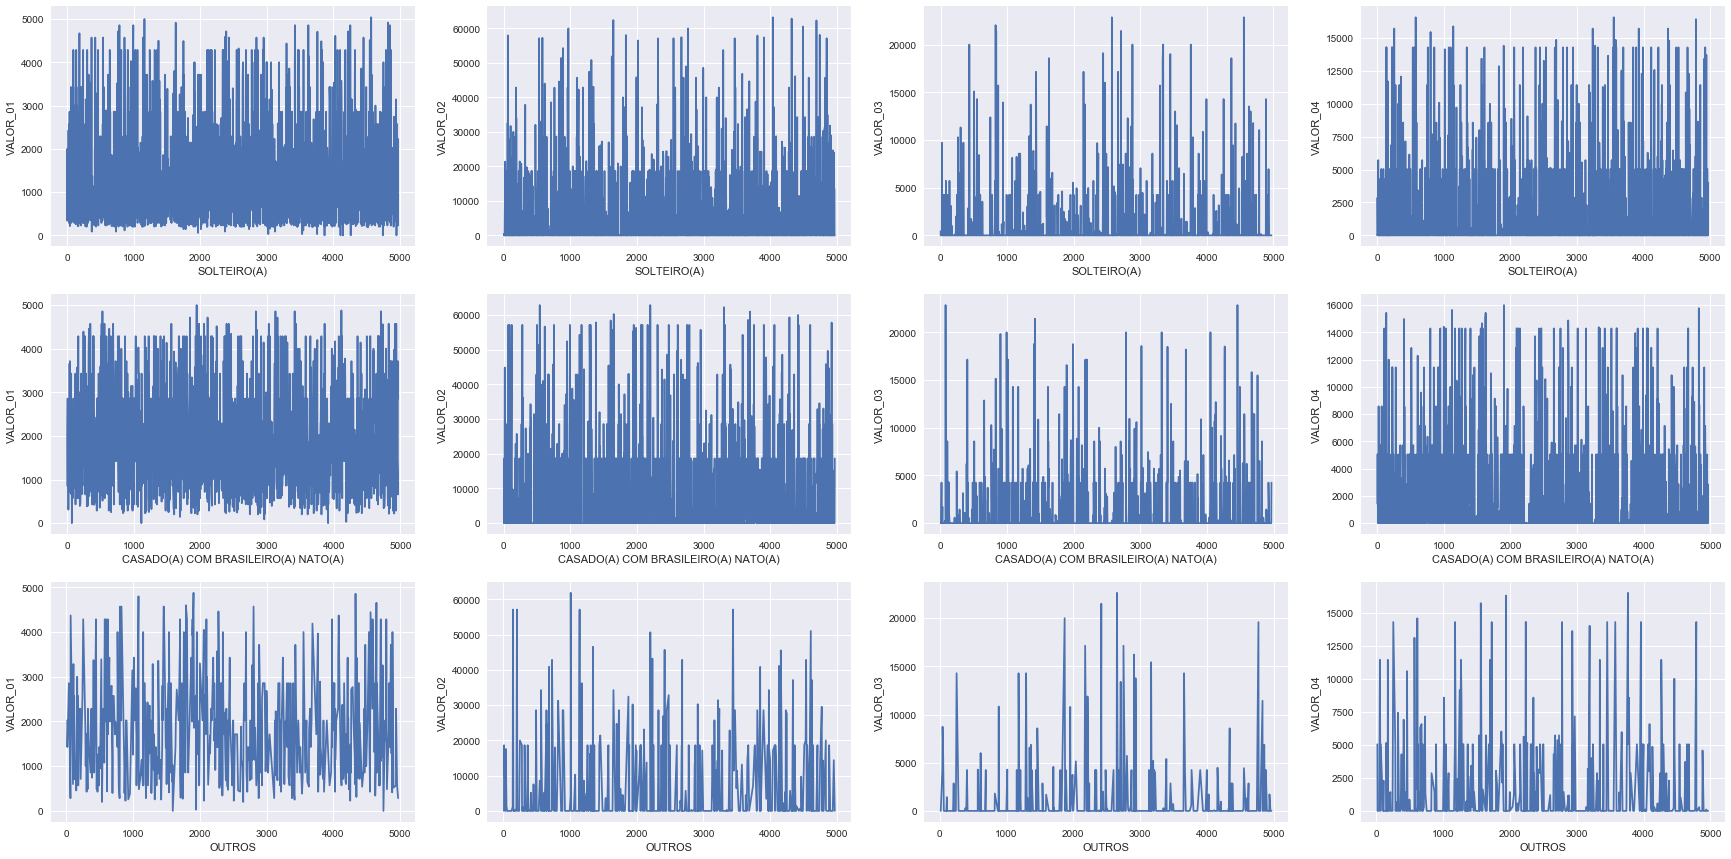

In [36]:
estudo_recat("ESTADO_CIVIL",30,15)

A proxima variável a ser estudad foi a FAIXA_ETARIA.
Esta variável primeiramente foi criada com base na variável ANO. A partir da variável intermediária IDADE, as observações foram agrupadas em INFANTIL (abaixo de 18 anos), JOVEM (entre 18 e 30 anos), ADULTO1 (entre 30 e 35 anos), ADULTO2 (entre 35 e 40 anos), ADULTO3 (acima de 40 anos). Este agrupamento foi realizado baseado nas categorias sociais (criança, jovem, adulto) e no equilíbrio da quantidade de observações em cada nível.

Uma vez criada as categorias, os gráficos de contraponto com as variáveis númericas VALOR_01, VALOR_02, VALOR_03 e VALOR_04 mostraram leve semelhança entre o padrão dos níveis JOVEM e ADULTO3 e ADULTO1 e ADULTO2, por tanto estes níveis também foram agrupados.

Desde a primeira categorização desta variável, ficou evidente a baixa quantidade de observações no nível INFANTIL, apenas 13 registros, portanto estes registros foram excluídos da base de dados, para não criar ruído nos outros perfis de clientes.

In [37]:
data_aux["FAIXA_ETARIA"]=list(map(aplica_faixa_etaria,data_aux["ANO"]))
# REMOÇÃO DE CRIANÇAS DA BASE
data_aux = data_aux[data_aux["FAIXA_ETARIA"] != "infantil"]
data_aux["FAIXA_ETARIA"].value_counts()

jovem/idoso    2712
adulto         2238
Name: FAIXA_ETARIA, dtype: int64

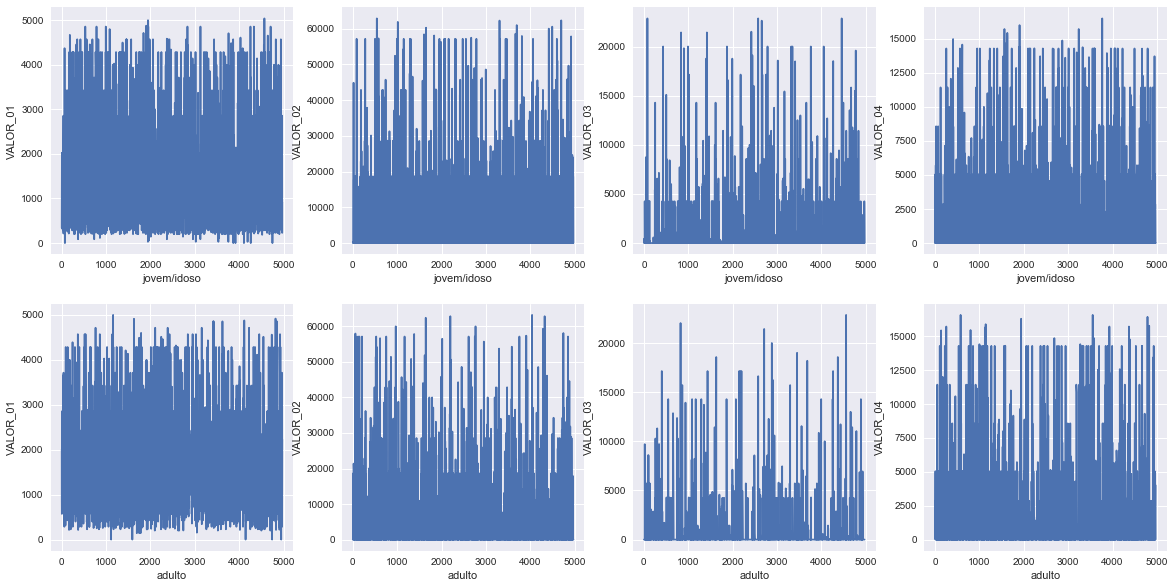

In [38]:
estudo_recat("FAIXA_ETARIA",20,10)

In [39]:
data3 = data_aux.copy()

# CRIAÇÃO DE VARIÁVEIS DUMMIES

In [40]:
data_aux = data3.copy()

Para visualização de alguns gráficos e utilização de modelos que só aceitam valores numéricos, foram criadas variáveis dummies a partir das variáveis categoricas.

In [41]:
profissao = pd.get_dummies(data_aux['PROFISSAO'],drop_first=True)
genero = pd.get_dummies(data_aux['GENERO'],drop_first=True)
estado_civil = pd.get_dummies(data_aux['ESTADO_CIVIL'],drop_first=True)
perfil = pd.get_dummies(data_aux['PERFIL'],drop_first=True)
faixaetaria = pd.get_dummies(data_aux['FAIXA_ETARIA'],drop_first=True)

base_com_dummies = pd.concat([data_aux.drop(["PROFISSAO","GENERO","ESTADO_CIVIL","PERFIL","FAIXA_ETARIA"],axis=1),profissao,genero,estado_civil,perfil,faixaetaria],axis=1)

In [42]:
base_dummies_profissao = data_aux.copy()
base_dummies_profissao.drop(["GENERO","ESTADO_CIVIL","PERFIL","FAIXA_ETARIA"], axis=1,inplace=True)
base_dummies_profissao = pd.concat([base_dummies_profissao,genero,estado_civil,perfil,faixaetaria],axis=1)

In [43]:
base_dummies_genero = data_aux.copy()
base_dummies_genero.drop(["ESTADO_CIVIL","PERFIL","FAIXA_ETARIA","PROFISSAO"], axis=1,inplace=True)
base_dummies_genero = pd.concat([base_dummies_genero,estado_civil,perfil,faixaetaria,profissao],axis=1)

In [44]:
base_dummies_estadocivil = data_aux.copy()
base_dummies_estadocivil.drop(["GENERO","PERFIL","FAIXA_ETARIA","PROFISSAO"], axis=1,inplace=True)
base_dummies_estadocivil = pd.concat([base_dummies_estadocivil,genero,perfil,faixaetaria,profissao],axis=1)

In [45]:
base_dummies_faixaetaria = data_aux.copy()
base_dummies_faixaetaria.drop(["GENERO","ESTADO_CIVIL","PERFIL","PROFISSAO"], axis=1,inplace=True)
base_dummies_faixaetaria = pd.concat([base_dummies_faixaetaria,genero,estado_civil,perfil,profissao],axis=1)

In [46]:
base_dummies_perfil = data_aux.copy()
base_dummies_perfil.drop(["GENERO","ESTADO_CIVIL","FAIXA_ETARIA","PROFISSAO"], axis=1,inplace=True)
base_dummies_perfil = pd.concat([base_dummies_perfil,genero,estado_civil,faixaetaria,profissao],axis=1)

In [47]:
data4 = data_aux.copy()

# VISUALIZAÇÃO DOS DADOS

Esta seção tem o objetivo de oferecer insights quanto ao cruzamento das variáveis do modelo e visualizações isoladas de cada variável. Estas visualizações foram realizadas em vários momentos no decorrer do desenvolvimento do modelo, porém, a título de organização do código, todas as visualizações foram organizadas nesta seção.

In [48]:
data_aux = data4.copy()
data_aux.head(1)

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,ANO,FAIXA_ETARIA
0,780,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.857143,342.857143,428.571429,28.571429,A,1992,jovem/idoso


#### No grid abaixo é possível observar a correlação de todas as variáveis contínuas entre si.
#### Algumas observações são dignas de destaque, são elas:
##### 1. A variável GEO_REFERENCIA não tem correlação com ennhuma outra variável numérica
##### 2. As variáveis VALOR_01 e VALOR_02 tâm alta correlação
##### 3. As variáveis VALOR_01 e ANO têm correlação inversa, o que significa que quanto mais novo o cliente mais alto o valor da variável VALOR_01, fenomeno que ocorre em menor grau nas variáveis VALOR_02, VALOR_03 e VALOR_04
##### 4. As variáveis VALOR_03 e VALOR_04 também têm correlação com a variável VALOR_02, em menor grau

#### A partir das conclusões obtidas pode ser possível inferir diversas regras de negócio, a depender do significado das variáveis e do contexto em que será aplicado. Por exemplo, caso as variáveis VALOR_N correspondam a um valor em dinheiro utilizado em viagens, é possível inferir que clientes com maior idade têm um gasto maior que cliente mais novos. 

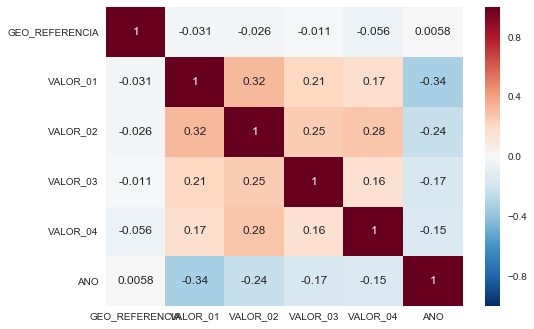

In [49]:
sns.heatmap(data_aux.corr(),annot=True)

#### Os proximos 4 gráficos apresentam os valores VALOR_N em contraponto a FAIXA_ETARIA dos clientes.

#### É possível observar uma concentração ligeiramente maior na coluna ADULTO em relação a coluna JOVEM/IDOSO, para as variáveis VALOR_01 e VALOR_02.

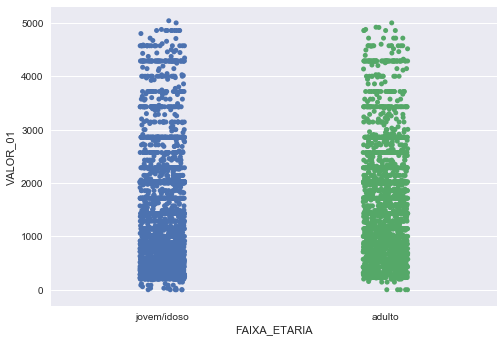

In [50]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_01",data=data_aux,jitter=True)

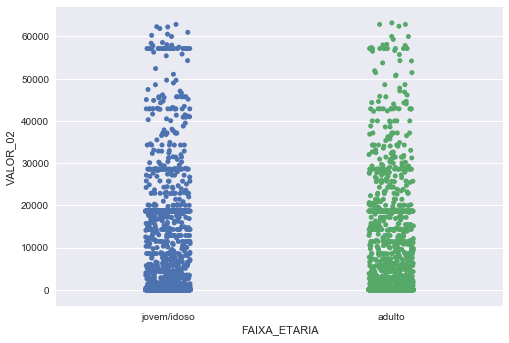

In [51]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_02", data=data_aux,jitter=True)

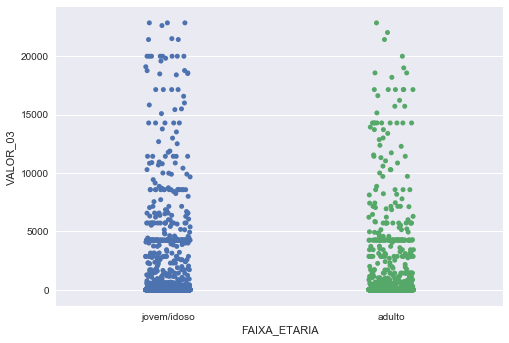

In [52]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_03", data=data_aux,jitter=True)

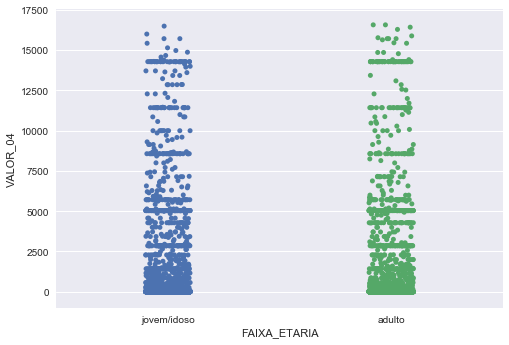

In [53]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_04", data=data_aux,jitter=True)

#### Os proximos 4 gráficos apresentam os valores VALOR_N em contraponto a GENERO dos clientes.

#### É possível observar uma concentração maior na coluna M em relação a coluna F, entretanto, isto ocorre devido maior quantidade de observações com GENERO com valor M.

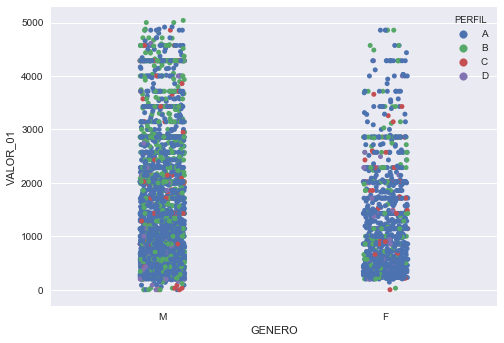

In [54]:
sns.stripplot(x="GENERO", y="VALOR_01", hue='PERFIL',data=data_aux,jitter=True)

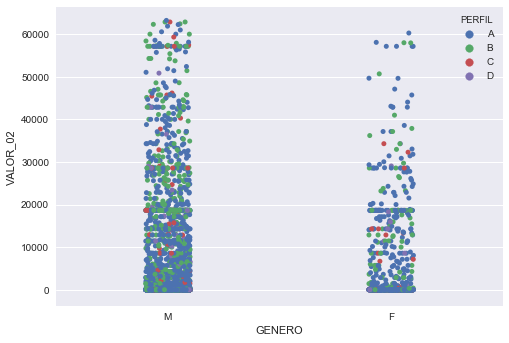

In [55]:
sns.stripplot(x="GENERO", y="VALOR_02", hue='PERFIL',data=data_aux,jitter=True)

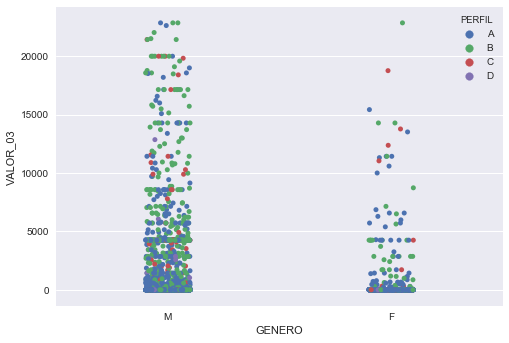

In [56]:
sns.stripplot(x="GENERO", y="VALOR_03", hue='PERFIL',data=data_aux,jitter=True)

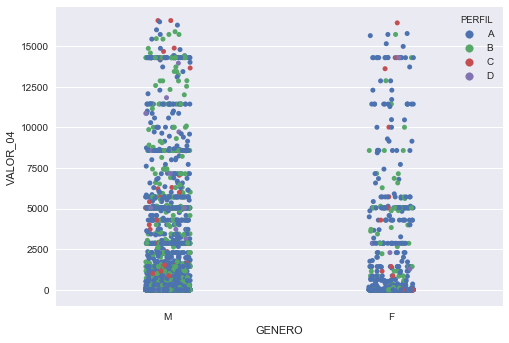

In [57]:
sns.stripplot(x="GENERO", y="VALOR_04", hue='PERFIL',data=data_aux,jitter=True)

#### Os proximos 4 gráficos apresentam os valores VALOR_N em contraponto a ESTADO_CIVIL dos clientes.
#### É possível observar uma concentração ligeiramente maior no topo da coluna CASADO(A) COM BRASILEIRO(A) NATIVO(A) em relação às outras colunas, para as variáveis VALOR_01 e VALOR_02. Este fato é interessante, porque mesmo a categoria SOLTEIRO(A) contendo mais registros, as observações com maiores valores nas variáveis VALOR_N estão na categoria CASADO(A) COM BRASILEIRO(A) NATIVO(A), o que mais uma vez pode evidenciar um padrão de consumo dos clientes, mostrando que pessoas casadas consomem um valor maior que pessoas solteiras ou em outros tipos de relacionamentos.

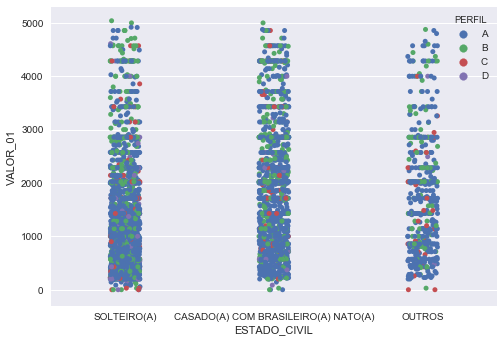

In [58]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_01", hue='PERFIL',data=data_aux,jitter=True)

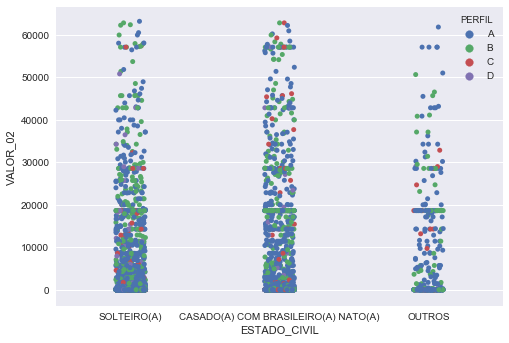

In [59]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_02", hue='PERFIL',data=data_aux,jitter=True)

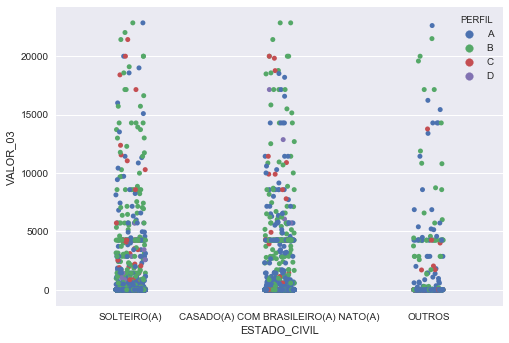

In [60]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_03", hue='PERFIL',data=data_aux,jitter=True)

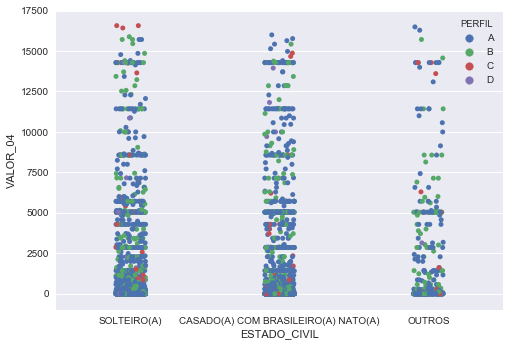

In [61]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_04", hue='PERFIL',data=data_aux,jitter=True)

#### Os proximos 4 gráficos apresentam os valores VALOR_N em contraponto a PERFIL dos clientes.
#### É possível observar uma concentração maior nas colunas A e B em relação às outras colunas. Nesta variável ocorre o mesmo fato da variável ESTADO_CIVIL, pois foi possível observar nas análises anteriores que o PERFIL A contém a maioria das observações da base, mas para altos valores de VALOR_N temos alta concentração no PERFIL A e PERFIL B.

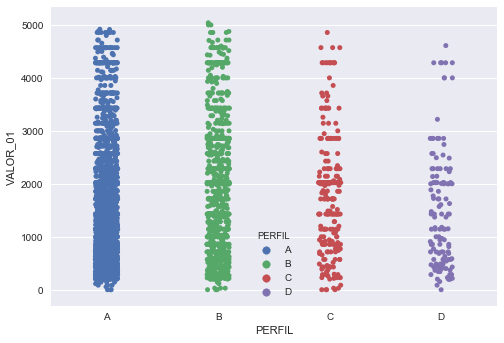

In [62]:
sns.stripplot(x="PERFIL", y="VALOR_01", hue='PERFIL',data=data_aux,jitter=True)

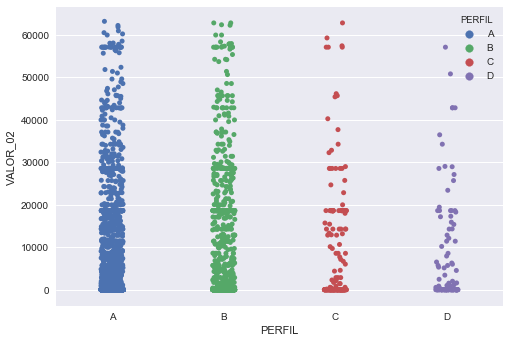

In [63]:
sns.stripplot(x="PERFIL", y="VALOR_02", hue='PERFIL',data=data_aux,jitter=True)

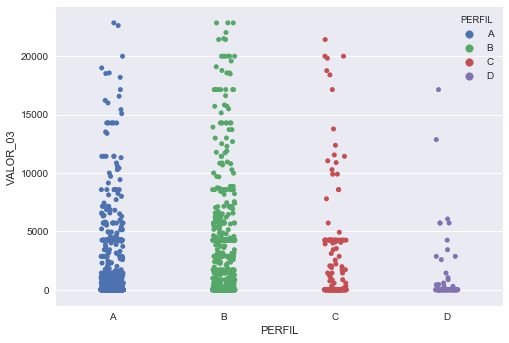

In [64]:
sns.stripplot(x="PERFIL", y="VALOR_03", hue='PERFIL',data=data_aux,jitter=True)

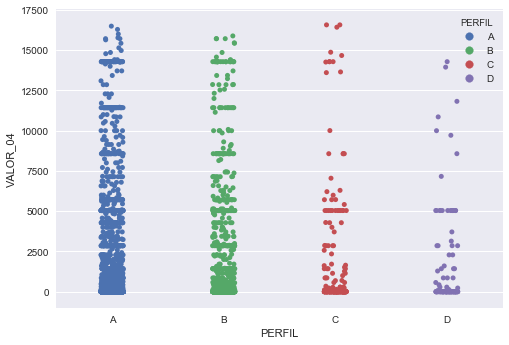

In [65]:
sns.stripplot(x="PERFIL", y="VALOR_04", hue='PERFIL',data=data_aux,jitter=True)

In [ ]:
data_aux.head(1)

#### O grid abaixo apresenta as características presentes no perfil A, predominante nesta base de dados.
#### É possível observar uma concentração levemente maior em usuários mais novos (ANO maior) e na variável VALOR_3. Mas não é possível identificar um perfil relevante a partir desta variável.

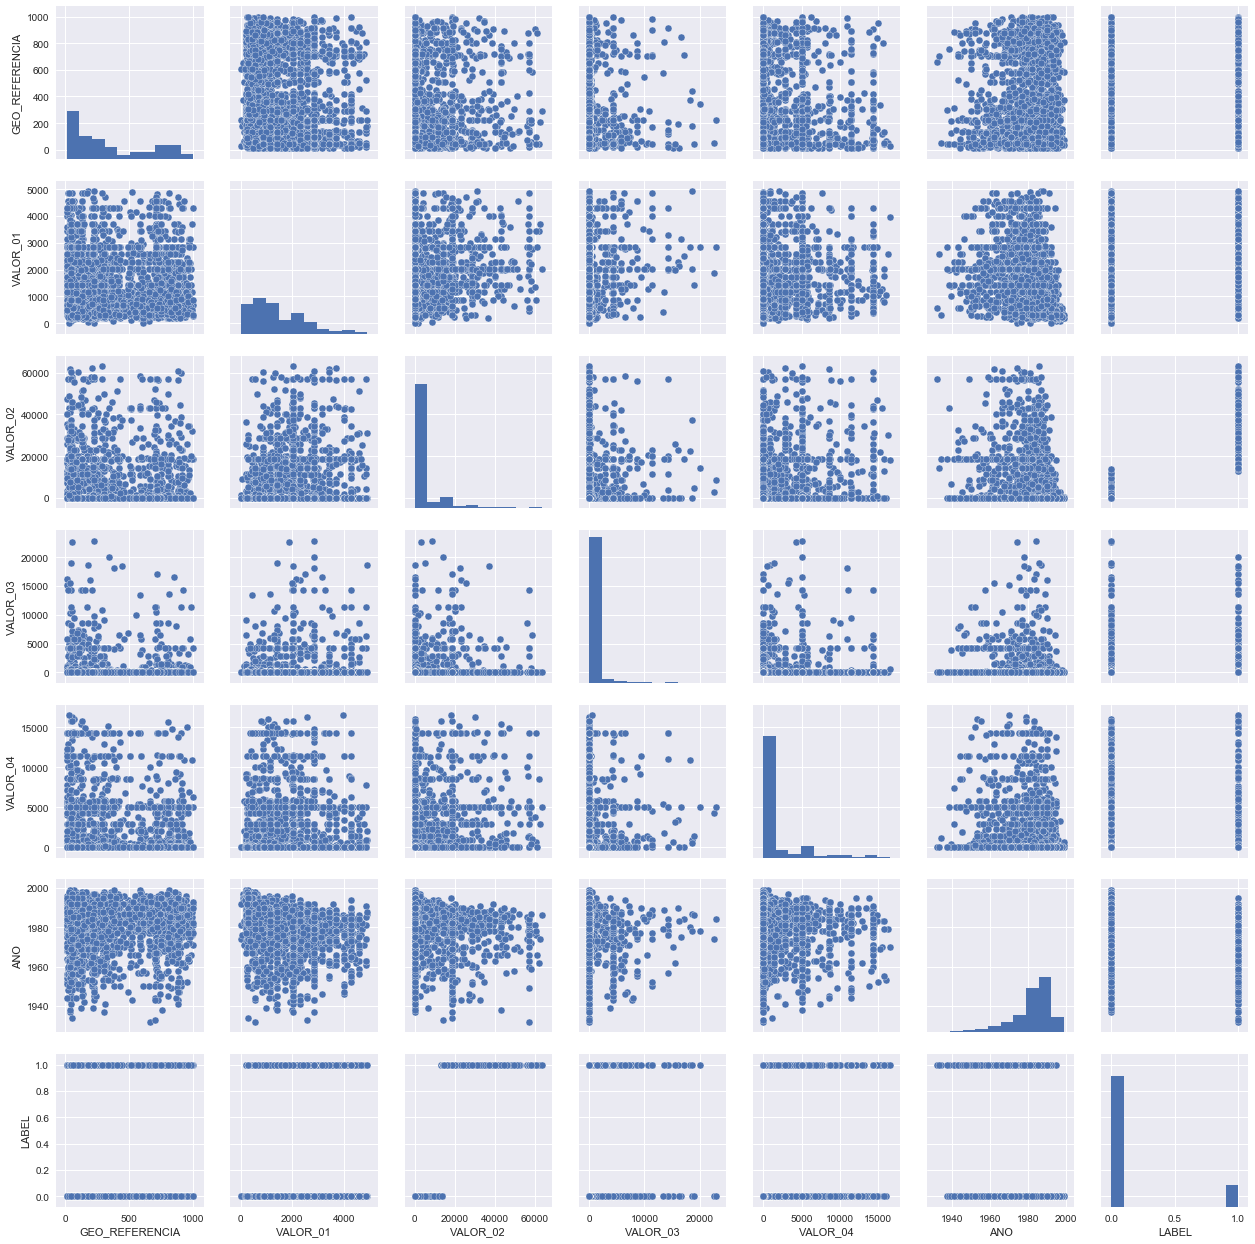

In [104]:
sns.pairplot(base_sem_dummies[base_sem_dummies["PERFIL"]=="A"],palette='rainbow')

#### A análise abaio apresenta a presença de valores altos das variáveis contínuas nas profissões dos clientes.
#### É  possível observar que para as profissões BANCARIO E ECONOMIARIO, ENGENHEIRO, MÉDICO e SERVIDOR PÚBLICO FEDERAL a média de VALOR_2 é bem alta. em comparação às outras profissões.
#### Também é possível observar este padrão segue nas outras variáveis VALOR_N, com menor intensidade.
#### O ano de nascimento (IDADE) não tem nenhuma influência em relação a profissão dos clientes.

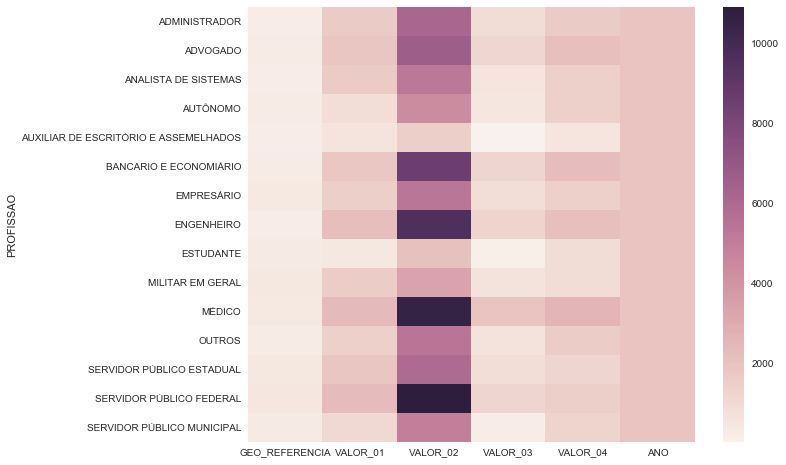

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(base_dummies_profissao.drop(["M","OUTROS","SOLTEIRO(A)","B","C","D","jovem/idoso"],axis=1).groupby("PROFISSAO").mean())

#### Em relação ao GENERO é possível observar que a presença de homens nas profissões de ESTUDANTE, SERVIDOR PUBLICO FEDERAL, AUTÔNOMO é mais alta que em outras profissões.

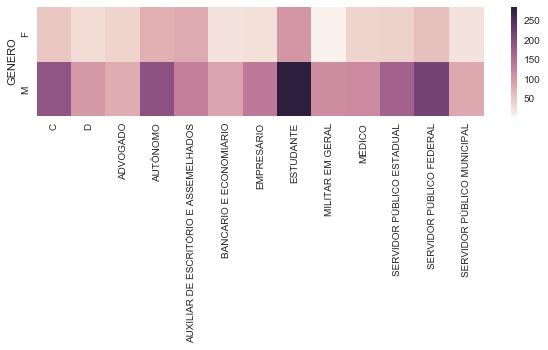

In [68]:
plt.figure(figsize=(10,2))
sns.heatmap(base_dummies_genero.drop(["GEO_REFERENCIA","VALOR_01","VALOR_02","VALOR_03","VALOR_04","ANO","SOLTEIRO(A)","jovem/idoso","B","OUTROS","ANALISTA DE SISTEMAS","ENGENHEIRO"],axis=1).groupby("GENERO").sum())

#### Em relação a faixa etária, não há diferença relevante na profissão de ENGENHEIRO
#### Nas profissões de ANALISTA DE SISTEMAS e SERVIDOR PUBLICO FEDERAL existe uma predominância de ADULTOS (entre 30 e 40 anos)
#### Nas profissões de AUTÔNOMO, AUXILIAR DE ESCRITÓRIOS, EMPRESÁRIO e ESTUDANTE, existe uma predominância de JOVENS ou ADULTOS acima de 40 anos.

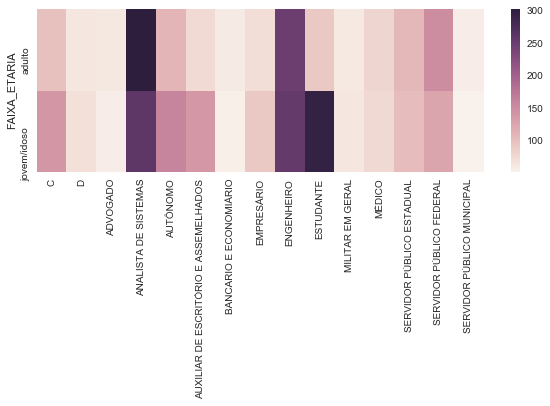

In [69]:
plt.figure(figsize=(10,3))
sns.heatmap(base_dummies_faixaetaria.drop(["GEO_REFERENCIA","VALOR_01","VALOR_02","VALOR_03","VALOR_04","ANO","M","OUTROS","SOLTEIRO(A)","B"],axis=1).groupby("FAIXA_ETARIA").sum())

#### Quanto ao ESTADO_CIVIL, é possível observar uma predominância de pessoas solteiras nas profissões ANALISTAS DE SISTEMAS e ESTUDANTES.

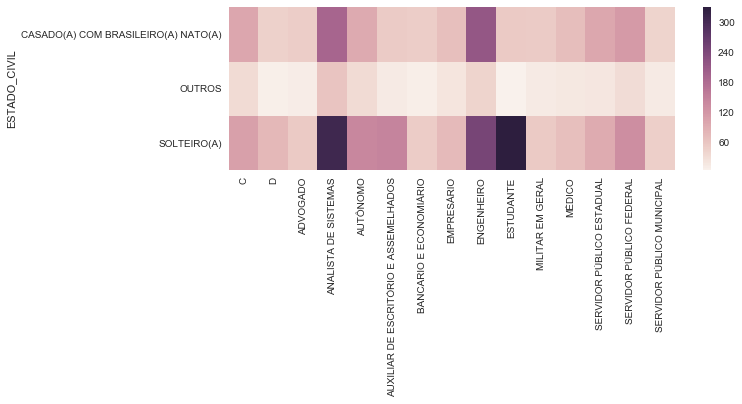

In [70]:
plt.figure(figsize=(10,3))
sns.heatmap(base_dummies_estadocivil.drop(["GEO_REFERENCIA","VALOR_01","VALOR_02","VALOR_03","VALOR_04","ANO","M","jovem/idoso","B","OUTROS"],axis=1).groupby("ESTADO_CIVIL").sum())

## DISTRIBUIÇÕES DAS VARIÁVEIS CONTÍNUAS

#### A próxima seção apresenta a distribuição das variáveis contínuas do modelo. Esta informação é útil na decisão da técnica de modelagem que será escolhida e da necessidade de novas categorização nos dados.

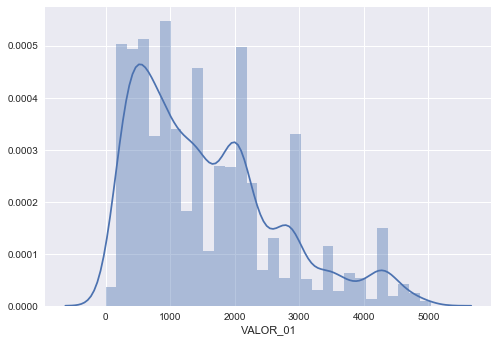

In [71]:
sns.distplot(data_aux["VALOR_01"])

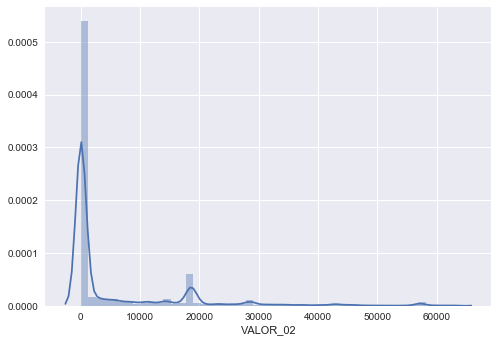

In [72]:
sns.distplot(data_aux["VALOR_02"])

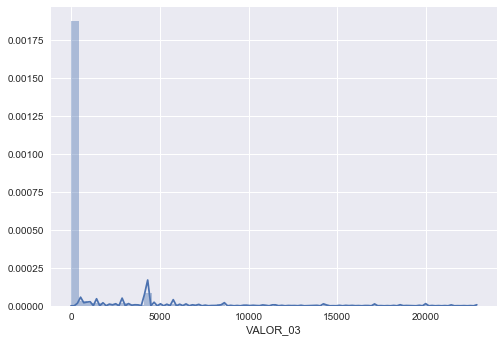

In [73]:
sns.distplot(data_aux["VALOR_03"])

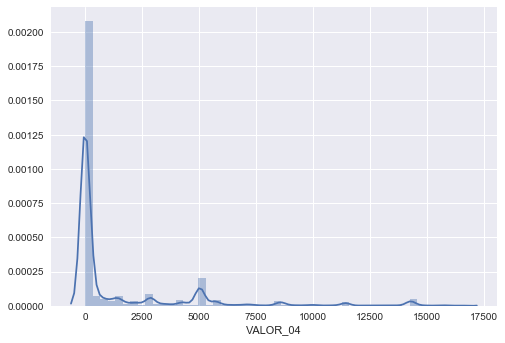

In [74]:
sns.distplot(data_aux["VALOR_04"])

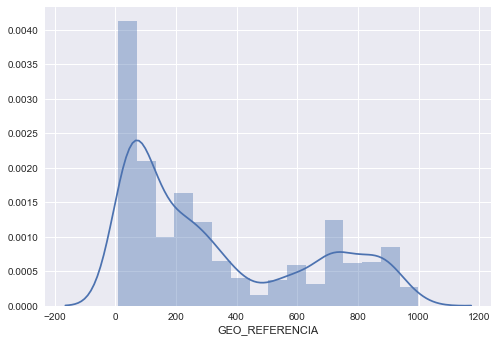

In [75]:
sns.distplot(data_aux["GEO_REFERENCIA"])

# APLICAR TÉCNICAS DE MODELAGEM

Esta seção será utilizada para aplicar diferentes técnicas de modelagem nos dados análisados e tratados.
Os resultados serão comparados a fim de encontrar o modelo mais acertivo no agrupamento dos dados analisados, de modo que os grupos encontrados reúnam observações o mais semelhantes dentro das observações dentro do seu próprio grupo e o mais diferentes quando comparados a observações de outros grupos.

A base que será utilizada será a base de variáveis dummies, devido a facilidade em manipulação de valores numéricos para a maioria das técnicas de modelagem.

Foi necessário excluir algumas variáveis, devido a baixa correlação com outras variáveis do modelo, no caso de GEO_REFERENCIA, e a alta colinearidade com outras variáveis, no caso do ANO.

In [76]:
data_aux = base_com_dummies.copy()
data_aux=data_aux.drop(["GEO_REFERENCIA","ANO"],axis=1)
data_aux.head()

,VALOR_01,VALOR_02,VALOR_03,VALOR_04,ADVOGADO,ANALISTA DE SISTEMAS,AUTÔNOMO,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,BANCARIO E ECONOMIÁRIO,EMPRESÁRIO,...,SERVIDOR PÚBLICO ESTADUAL,SERVIDOR PÚBLICO FEDERAL,SERVIDOR PÚBLICO MUNICIPAL,M,OUTROS,SOLTEIRO(A),B,C,D,jovem/idoso
0,342.857143,342.857143,428.571429,28.571429,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,942.857143,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,2000.000000,0.000000,0.000000,2857.142857,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,857.142857,285.714286,0.000000,1428.571429,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2022.698192,0.000000,0.000000,5041.123332,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


# KMeans
#### A primeira técnica que será utilizada será o Kmeans, por ser um algoritmo recomendado para uso geral e por ser interessante em dados com poucos clusters.

In [77]:
#lista = range(1,1000)
#for i in lista:
i=2
kmeans = KMeans(n_clusters=i)
kmeans.fit(data_aux)
#    erro = np.abs(data_aux[[]]-kmeans.cluster_centers_[i])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### O Gráfico abaixo apresenta os centróides resultantes do agrupamento do modelo

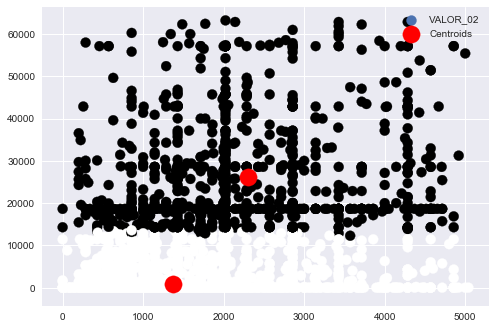

In [78]:
plt.scatter(data_aux["VALOR_01"], data_aux["VALOR_02"], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()

plt.show()

#### O Gráfico abaixo apresenta um overview geral do agrupamento dos clientes utilizando a técnica Kmeans.
#### Como é possível observar, apenas a variável VALOR_02 foi considerada, pois o agrupamento não distíngue os grupos em nenhuma outra variável. Este não é um resultado esperado no agrupamento de dados, pois não separa os indivíduos diferentes e junta os semelhantes entre si. Portanto, serão utilizadas outras técnicas a fim de encontrar uma melhor clusterização das observações.

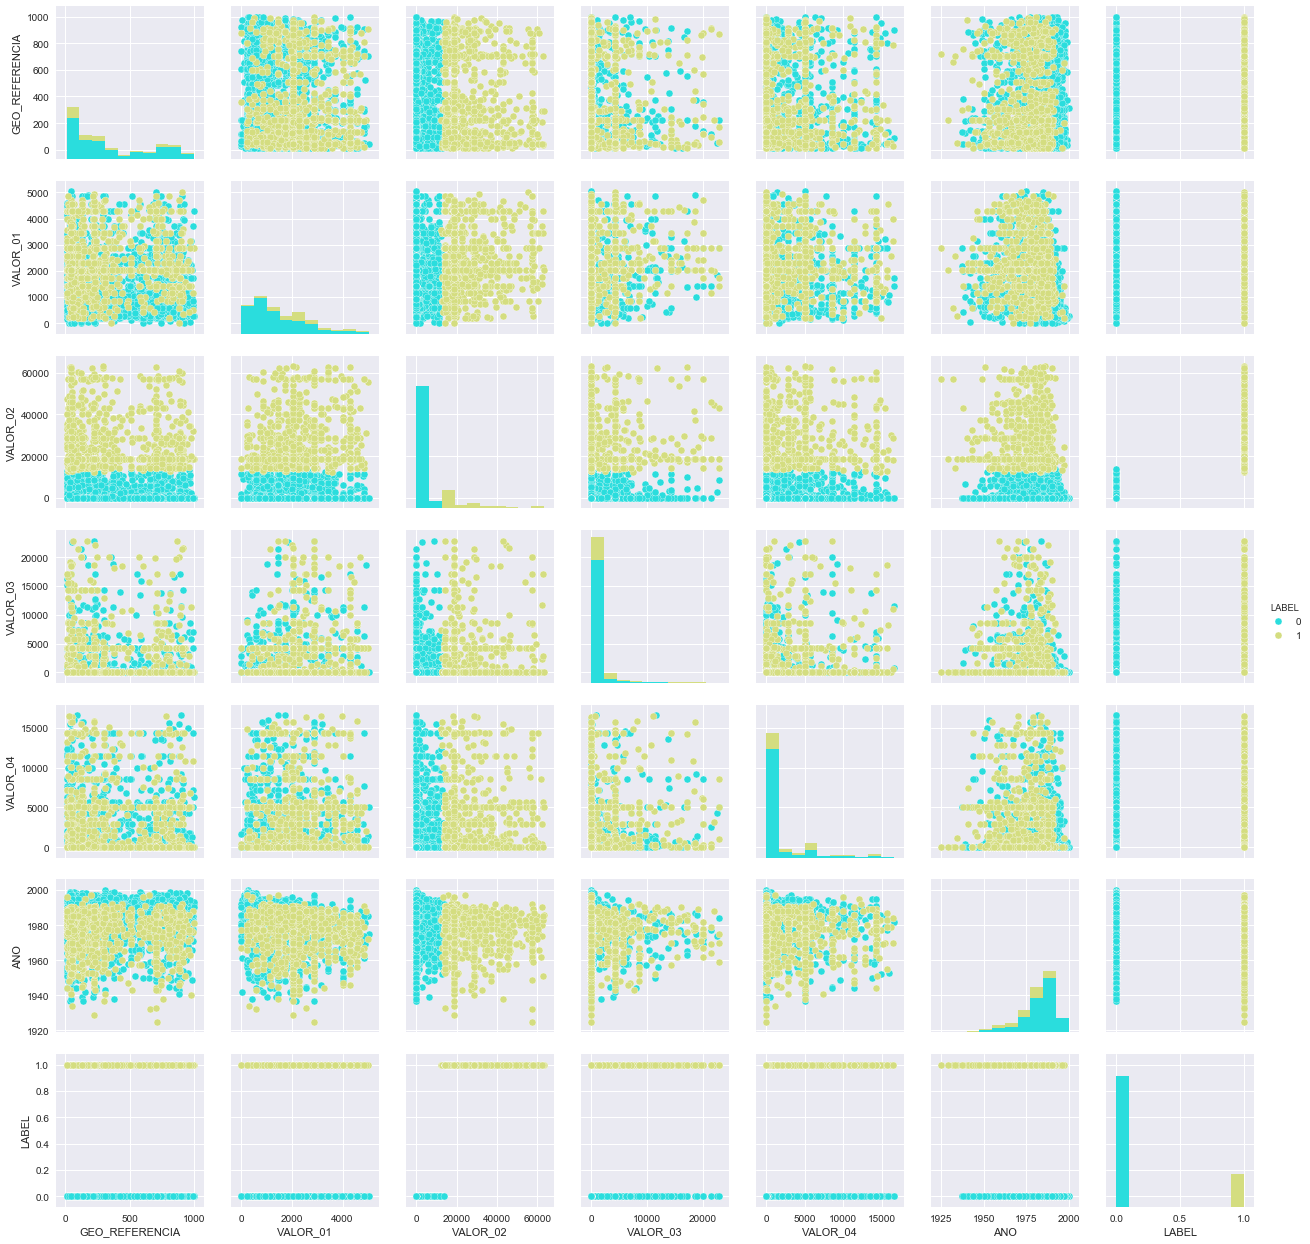

In [79]:
base_sem_dummies = data4.copy()
base_sem_dummies["LABEL"] = kmeans.labels_
sns.pairplot(base_sem_dummies,hue='LABEL',palette='rainbow')

# DBScan
#### Uma possível razão para o modelo não ter resultado em um melhor agrupamento dos dados, pode ser a necessidade de grupos de mesmo tamanho do Kmeans.
#### A próxima técnica que será aplicada é o DBScan. Este algoritmo é recomendado em casos em que os clusters têm tamanhos diferentes e quando tem-se uma grande quantidade de grupos, ele utiliza geometria não plana para agrupar as observações, permitindo deste modo a utlização de várias variáveis na identificação dos grupos...
#### Como o presente modelo é não supervisionado e algumas variáveis são desconhecidas, não é possível prever a quantidade de clusters que será gerado. Outro fator que desfavorece a utilização do Kmeans, que solicita a quantidade de clusters para treinar a base de dados.

Números de Clusters Estimados: 37
Coeficiente Silhueta: -0.150


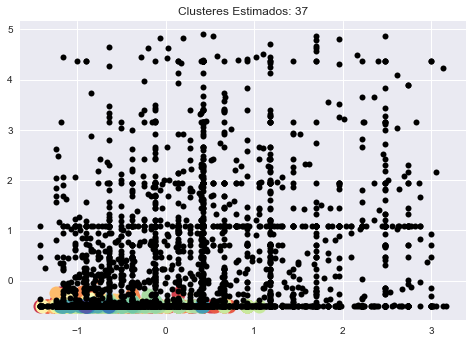

In [84]:
X = data_aux
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
m = np.zeros_like(db.labels_, dtype=bool)
m[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Números de Clusters Estimados: %d' % n_clusters_)
print("Coeficiente Silhueta: %0.3f" % metrics.silhouette_score(X, labels))

n_labels = set(labels)
cores = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(n_labels))]
for k, col in zip(n_labels, cores):
    if k == -1:
        col = [0, 0, 0, 1]

    mc = (labels == k)

    xy = X[mc & m]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)

    xy = X[mc & ~m]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('Clusteres Estimados: %d' % n_clusters_)
plt.show()

#### O modelo resultante do DBScan apresentou um grande grupo com a maioria das observações e 36 pequenos grupos.
#### A métrica utilizada para avaliação do modelo foi o coeficiente da silheta dos clusters, que avalia o quanto os grupos estão distantes entre si e compactos internamente. Quanto mais próximo de 1 mais compactos e separados, quanto mais próximo de -1, mais esparsos e próximos.
#### O presente modelo apresentou um coeficiente de -0,150. Este é um valor aceitável, dado a baixa qualidade das variáveis utilizadas no modelo.

# AVALIAÇÃO DO MODELO

#### Para compreensão e avaliação do modelo, este será aplicado a uma árvore de decisão, para que possamos entender como as variáveis do modelo explicam a atribuíção a cada grupo estimado.
#### Seria possível escolher outras técnicas de aprendizado supervisionado como regressão logística ou SVM, mas optei pela árvore de decisão pelo fator didático que está técnica fornece, de modo que fica clara a definição de cada grupo para cada observação.

In [99]:
X = data_aux
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions)) # precisão obtida em cada grupo

             precision    recall  f1-score   support

         -1       0.98      0.95      0.97      1105
          0       1.00      1.00      1.00        17
          1       0.94      1.00      0.97        15
          2       0.71      1.00      0.83         5
          3       0.98      1.00      0.99        42
          4       0.70      1.00      0.82         7
          5       0.80      1.00      0.89         8
          6       1.00      0.96      0.98        28
          7       0.97      1.00      0.99        36
          8       1.00      1.00      1.00        18
          9       0.87      1.00      0.93        26
         10       1.00      1.00      1.00        12
         11       1.00      0.64      0.78        11
         12       0.86      1.00      0.92         6
         13       0.72      0.93      0.81        14
         15       1.00      1.00      1.00        10
         16       0.67      0.80      0.73         5
         17       1.00      1.00      1.00   

#### A tabela acima apresenta métricas de avaliação de performance na previsão de qual grupo uma observação pertence, dado o prévio agrupamento que foi realizado.
#### Os resultados apresentam uma média de 95% de precisão e um scare de 94%, o que significa que em 94% das vezes o modelo acerta.

In [100]:
# O Código abaixo seria utilizado para obtenção da árvore de decisão de estudo do modelo obtido, entretanto, por questões de infraestrutura do ambiente de desenvolvimento, não foi possível executar a seguinte análise.
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[1:])

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

IndexError: list index out of range

# CONCLUSÕES

Algumas considerações podem ser tiradas do modelo desenvolvido, a fim de tomada de decisão a nível estratégico e a nível de execução.
Sao elas:
- 70% da base de dados pertence ao perfil A. Caso este perfil não tenha sido identificado pela própria empresa, ele deve ser análisado em contraponto a informações com ticket médio destes usuários, pois possívelmente este perfil corresponde ao púplico alvo da empresa.
- Por outro lado,  perfil B concentra pessoas com alto valor para as variáveis VALOR_01, VALOR_02, VALOR_03 e VALOR_04, se estas variáveis correspondem a gasto monetário, seria interessante rever o nicho de mercado o qual está sendo alcançado. O perfil A tem um maior alcance, enquanto o perfil B tem um maior resultado financeiro.
- A maioria dos clientes são solteiros, homens.
- As variáveis analisadas independem de onde o usuário está localizado geograficamente.

- O top 5 das profissões é Analista de sistemas, Engenheiro, Administrador, Estudante e Servidor Público Federal.
- Mas as profissões BANCARIO E ECONOMIARIO, ENGENHEIRO, MÉDICO e SERVIDOR PÚBLICO FEDERAL que têm média de VALOR_2 alta.
- De forma geral, idade não tem influência em relação a profissão dos clientes.
- Mas nas profissões de ANALISTA DE SISTEMAS e SERVIDOR PUBLICO FEDERAL existe uma predominância de ADULTOS, entre 30 e 40 anos, especificamente.
- E nas profissões de AUTÔNOMO, AUXILIAR DE ESCRITÓRIOS, EMPRESÁRIO e ESTUDANTE, existe uma predominância de JOVENS ou ADULTOS acima de 40 anos.
- O GENERO Masculino também tem forte presença nas profissões de ESTUDANTE, SERVIDOR PUBLICO FEDERAL, AUTÔNOMO.
- Quanto ao ESTADO_CIVIL, é possível observar uma predominância de pessoas solteiras nas profissões ANALISTAS DE SISTEMAS e ESTUDANTES.
- Este estudo das profissões pode ser utilizado no formato de omunicação com os clientes do público alvo da empresa.

- Os valores VALOR_01 e VALOR_02 estão muito relacionados, o que indica que quando um sobe o outro valor acompanha. Estas variáveis podem ser observadas em conjunto a fim de prever o aumento de um acontecimento observando outro fator.
- As variáveis VALOR_03 e VALOR_04 também têm crescem a medida que VALOR_02 aumenta, mas em menor proporção.
- Em relação a idade do usuário, as variáveis VALOR_N sofrem o mesmo efeito, quanto mais velho o usuário maior o valor das variáveis VALOR_01, VALOR_02, VALOR_03 e VALOR_04.
- Clientes adultos e casados têm valores maiores para as variáveis VALOR_01 e VALOR_02, o que pode reforçar a ideia de que estes valores estão relacionados a fatores financeiros do usuário, mas não temos dados suficientes para realizar esta afirmação.